# 🚗 Interactive Linear Regression Visualization
## Car Price Prediction Based on Mileage

This notebook provides interactive visualizations for exploring how linear regression works with different parameters and data inputs.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display, clear_output
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Import our model
from predict_car_price import PredictCarPriceFromMileage

print("📚 Libraries loaded successfully!")
print("🎛️ Interactive widgets ready!")

📚 Libraries loaded successfully!
🎛️ Interactive widgets ready!


2025-08-08 13:50:33,028 - predict_car_price - INFO - Initialized PredictCarPriceFromMileage model
2025-08-08 13:50:33,029 - predict_car_price - INFO - Initial parameters: theta_0=0.0, theta_1=0.0
2025-08-08 13:50:33,040 - predict_car_price - INFO - Loading data from ../static/data.csv
2025-08-08 13:50:33,051 - predict_car_price - INFO - Successfully loaded 24 data points from CSV


📊 Dataset loaded: 24 data points
📈 Mileage range: 22,899 - 240,000 km
💰 Price range: $3,650 - $8,290


,Mileage (km),Price ($)
count,24.00,24.00
mean,101066.25,6331.83
std,52674.25,1319.65
min,22899.00,3650.00
25%,65020.50,5687.50
50%,83014.50,6495.00
75%,140975.00,7115.00
max,240000.00,8290.00


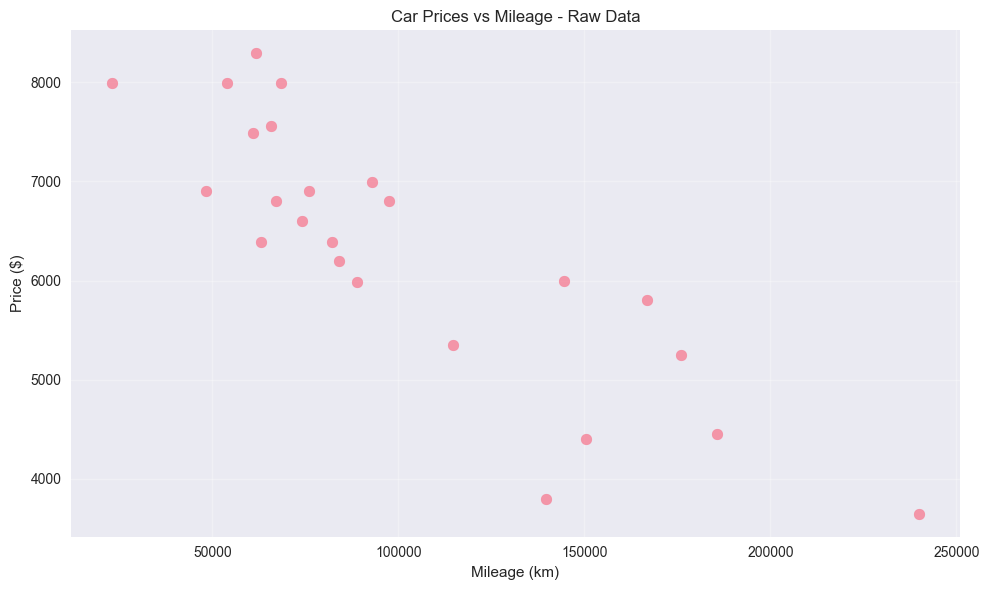

In [4]:
# Load the data
model = PredictCarPriceFromMileage()
data = PredictCarPriceFromMileage.load_data_from_csv("../static/data.csv")

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(data, columns=['Mileage (km)', 'Price ($)'])

print(f"📊 Dataset loaded: {len(df)} data points")
print(f"📈 Mileage range: {df['Mileage (km)'].min():,.0f} - {df['Mileage (km)'].max():,.0f} km")
print(f"💰 Price range: ${df['Price ($)'].min():,.0f} - ${df['Price ($)'].max():,.0f}")

# Display basic statistics
display(df.describe().round(2))

# Quick scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Mileage (km)'], df['Price ($)'], alpha=0.7, s=60)
plt.xlabel('Mileage (km)')
plt.ylabel('Price ($)')
plt.title('Car Prices vs Mileage - Raw Data')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [5]:
def interactive_training_demo(learning_rate=0.01, iterations=500, show_animation=True):
    """Interactive function to demonstrate training with different parameters."""
    
    # Create a fresh model
    demo_model = PredictCarPriceFromMileage()
    
    # Prepare the data
    x_data = df['Mileage (km)'].values
    y_data = df['Price ($)'].values
    
    if show_animation:
        # Create animated training visualization
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
        
        # Store intermediate results for animation
        theta_0_history = []
        theta_1_history = []
        cost_history = []
        
        # Manual training loop to capture intermediate states
        demo_model._validate_training_data(data)
        normalized_data, mileage_stats = demo_model._normalize_data(data)
        
        # Training iterations with history capture
        for i in range(0, iterations, max(1, iterations//20)):  # Show 20 frames max
            for _ in range(max(1, iterations//20)):
                if i < iterations:
                    cost = demo_model._calculate_cost(normalized_data)
                    cost_history.append(cost)
                    theta_0_history.append(demo_model.theta_0)
                    theta_1_history.append(demo_model.theta_1)
                    demo_model._gradient_descent_step(normalized_data, learning_rate)
        
        # Denormalize final parameters
        demo_model._denormalize_parameters(mileage_stats)
        demo_model.is_trained = True
        
        # Plot 1: Data with regression line
        ax1.clear()
        ax1.scatter(x_data, y_data, alpha=0.6, s=50, color='blue', label='Actual Data')
        
        # Generate prediction line
        x_range = np.linspace(x_data.min(), x_data.max(), 100)
        y_pred = [demo_model.get_price(x) for x in x_range]
        ax1.plot(x_range, y_pred, 'r-', linewidth=3, label=f'Predicted Line')
        
        ax1.set_xlabel('Mileage (km)')
        ax1.set_ylabel('Price ($)')
        ax1.set_title(f'Linear Regression Fit\nθ₀={demo_model.theta_0:.2f}, θ₁={demo_model.theta_1:.6f}')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: Cost function over time
        ax2.plot(cost_history, 'g-', linewidth=2)
        ax2.set_xlabel('Iteration')
        ax2.set_ylabel('Cost (MSE)')
        ax2.set_title('Cost Function During Training')
        ax2.grid(True, alpha=0.3)
        
        # Plot 3: Parameter evolution
        ax3.plot(theta_0_history, 'b-', linewidth=2, label='θ₀ (intercept)')
        ax3.set_xlabel('Iteration')
        ax3.set_ylabel('θ₀ value')
        ax3.set_title('Parameter θ₀ Evolution')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        
        # Plot 4: Slope parameter evolution
        ax4.plot(theta_1_history, 'r-', linewidth=2, label='θ₁ (slope)')
        ax4.set_xlabel('Iteration')
        ax4.set_ylabel('θ₁ value')
        ax4.set_title('Parameter θ₁ Evolution')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
    else:
        # Quick training without animation
        demo_model.train(data, iterations=iterations, learning_rate=learning_rate, verbose=False)
        
        # Simple results plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Plot 1: Data with regression line
        ax1.scatter(x_data, y_data, alpha=0.6, s=50, color='blue', label='Actual Data')
        x_range = np.linspace(x_data.min(), x_data.max(), 100)
        y_pred = [demo_model.get_price(x) for x in x_range]
        ax1.plot(x_range, y_pred, 'r-', linewidth=3, label='Predicted Line')
        ax1.set_xlabel('Mileage (km)')
        ax1.set_ylabel('Price ($)')
        ax1.set_title(f'Final Regression Line\nθ₀={demo_model.theta_0:.2f}, θ₁={demo_model.theta_1:.6f}')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: Training history
        if demo_model.training_history:
            ax2.plot(demo_model.training_history, 'g-', linewidth=2)
            ax2.set_xlabel('Iteration')
            ax2.set_ylabel('Cost (MSE)')
            ax2.set_title('Training Cost History')
            ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    # Print final statistics
    stats = demo_model.get_training_stats()
    print(f"🎯 Training Results:")
    print(f"   Final Cost: {stats.get('final_cost', 0):.2f}")
    print(f"   θ₀ (intercept): {demo_model.theta_0:.2f}")
    print(f"   θ₁ (slope): {demo_model.theta_1:.6f}")
    print(f"   Cost Reduction: {stats.get('cost_reduction', 0):.2f}")
    
    return demo_model

# Create interactive widget
interact(interactive_training_demo,
         learning_rate=widgets.FloatLogSlider(value=0.01, base=10, min=-4, max=-1, step=0.1, 
                                            description='Learning Rate:', style={'description_width': 'initial'}),
         iterations=widgets.IntSlider(value=500, min=50, max=2000, step=50, 
                                    description='Iterations:', style={'description_width': 'initial'}),
         show_animation=widgets.Checkbox(value=True, description='Show Animation', 
                                       style={'description_width': 'initial'}))

interactive(children=(FloatLogSlider(value=0.01, description='Learning Rate:', max=-1.0, min=-4.0, style=Slide…

<function __main__.interactive_training_demo(learning_rate=0.01, iterations=500, show_animation=True)>

2025-08-08 14:43:40,908 - predict_car_price - INFO - Initialized PredictCarPriceFromMileage model
2025-08-08 14:43:40,909 - predict_car_price - INFO - Initial parameters: theta_0=0.0, theta_1=0.0
2025-08-08 14:43:40,910 - predict_car_price - INFO - Starting training with 24 data points
2025-08-08 14:43:40,911 - predict_car_price - INFO - Training parameters: iterations=1000, learning_rate=0.01
2025-08-08 14:43:40,921 - predict_car_price - INFO - Training completed. Final cost: 222822.661037
2025-08-08 14:43:40,922 - predict_car_price - INFO - Final parameters: theta_0=8499.232712, theta_1=-0.021448


🔬 Comparing Training: With vs Without Normalization


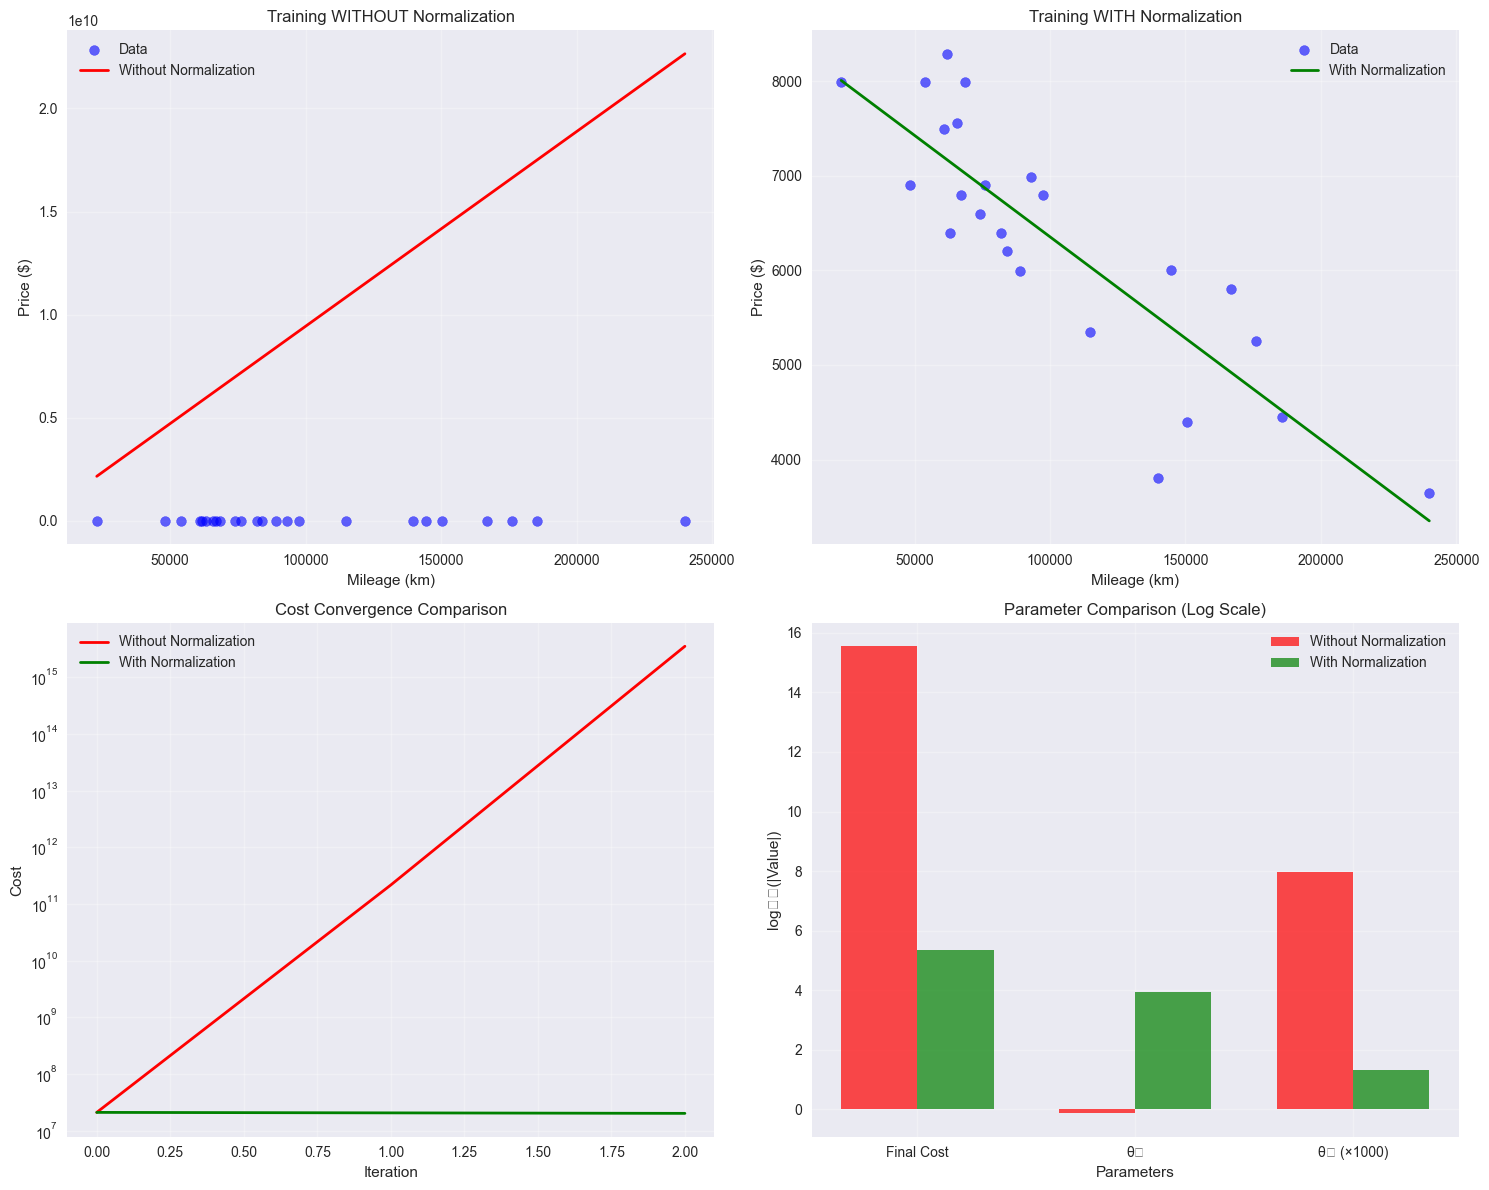

📊 Final Results Comparison:
   WITHOUT Normalization:
     Final Cost: 3.51e+15
     θ₀: 7.41e-01
     θ₁: 9.44e+04
   WITH Normalization:
     Final Cost: 222,822.66
     θ₀: 8499.23
     θ₁: -0.021448

✨ Normalization Benefits:
   🎯 Much more stable convergence
   📉 Lower final cost
   ⚡ Faster convergence
   🔧 Easier to tune learning rate


In [6]:
def compare_normalization_effect():
    """Compare training with and without normalization."""
    
    print("🔬 Comparing Training: With vs Without Normalization")
    print("=" * 60)
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # Model WITHOUT normalization (manual implementation)
    class SimpleLinearRegression:
        def __init__(self):
            self.theta_0 = 0.0
            self.theta_1 = 0.0
            self.cost_history = []
        
        def train(self, data, learning_rate, iterations):
            for i in range(iterations):
                cost = 0
                grad_0, grad_1 = 0, 0
                m = len(data)
                
                for mileage, price in data:
                    prediction = self.theta_0 + self.theta_1 * mileage
                    error = prediction - price
                    cost += error ** 2
                    grad_0 += error
                    grad_1 += error * mileage
                
                cost /= (2 * m)
                self.cost_history.append(cost)
                
                # Update parameters
                self.theta_0 -= learning_rate * grad_0 / m
                self.theta_1 -= learning_rate * grad_1 / m
                
                # Prevent explosion
                if cost > 1e15:
                    break
        
        def predict(self, mileage):
            return self.theta_0 + self.theta_1 * mileage
    
    # Train WITHOUT normalization
    model_no_norm = SimpleLinearRegression()
    model_no_norm.train(data, learning_rate=1e-8, iterations=1000)
    
    # Train WITH normalization
    model_with_norm = PredictCarPriceFromMileage()
    model_with_norm.train(data, learning_rate=0.01, iterations=1000, verbose=False)
    
    # Prepare data for plotting
    x_data = df['Mileage (km)'].values
    y_data = df['Price ($)'].values
    x_range = np.linspace(x_data.min(), x_data.max(), 100)
    
    # Plot 1: Without normalization
    y_pred_no_norm = [model_no_norm.predict(x) for x in x_range]
    ax1.scatter(x_data, y_data, alpha=0.6, s=50, color='blue', label='Data')
    ax1.plot(x_range, y_pred_no_norm, 'r-', linewidth=2, label='Without Normalization')
    ax1.set_xlabel('Mileage (km)')
    ax1.set_ylabel('Price ($)')
    ax1.set_title('Training WITHOUT Normalization')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: With normalization
    y_pred_with_norm = [model_with_norm.get_price(x) for x in x_range]
    ax2.scatter(x_data, y_data, alpha=0.6, s=50, color='blue', label='Data')
    ax2.plot(x_range, y_pred_with_norm, 'g-', linewidth=2, label='With Normalization')
    ax2.set_xlabel('Mileage (km)')
    ax2.set_ylabel('Price ($)')
    ax2.set_title('Training WITH Normalization')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Plot 3: Cost comparison (first 100 iterations to avoid scale issues)
    max_len = min(100, len(model_no_norm.cost_history), len(model_with_norm.training_history))
    ax3.plot(model_no_norm.cost_history[:max_len], 'r-', label='Without Normalization', linewidth=2)
    ax3.plot(model_with_norm.training_history[:max_len], 'g-', label='With Normalization', linewidth=2)
    ax3.set_xlabel('Iteration')
    ax3.set_ylabel('Cost')
    ax3.set_title('Cost Convergence Comparison')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    ax3.set_yscale('log')  # Log scale to show both
    
    # Plot 4: Final comparison metrics
    categories = ['Final Cost', 'θ₀', 'θ₁ (×1000)']
    no_norm_values = [
        model_no_norm.cost_history[-1] if model_no_norm.cost_history else float('inf'),
        model_no_norm.theta_0,
        model_no_norm.theta_1 * 1000
    ]
    with_norm_values = [
        model_with_norm.training_history[-1] if model_with_norm.training_history else 0,
        model_with_norm.theta_0,
        model_with_norm.theta_1 * 1000
    ]
    
    x_pos = np.arange(len(categories))
    width = 0.35
    
    # Use log scale for better visualization
    ax4.bar(x_pos - width/2, np.log10(np.abs(no_norm_values) + 1e-10), width, 
            label='Without Normalization', color='red', alpha=0.7)
    ax4.bar(x_pos + width/2, np.log10(np.abs(with_norm_values) + 1e-10), width, 
            label='With Normalization', color='green', alpha=0.7)
    
    ax4.set_xlabel('Parameters')
    ax4.set_ylabel('log₁₀(|Value|)')
    ax4.set_title('Parameter Comparison (Log Scale)')
    ax4.set_xticks(x_pos)
    ax4.set_xticklabels(categories)
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print comparison
    print(f"📊 Final Results Comparison:")
    print(f"   WITHOUT Normalization:")
    print(f"     Final Cost: {model_no_norm.cost_history[-1]:,.2e}")
    print(f"     θ₀: {model_no_norm.theta_0:.2e}")
    print(f"     θ₁: {model_no_norm.theta_1:.2e}")
    print(f"   WITH Normalization:")
    print(f"     Final Cost: {model_with_norm.training_history[-1]:,.2f}")
    print(f"     θ₀: {model_with_norm.theta_0:.2f}")
    print(f"     θ₁: {model_with_norm.theta_1:.6f}")
    
    print(f"\n✨ Normalization Benefits:")
    print(f"   🎯 Much more stable convergence")
    print(f"   📉 Lower final cost")
    print(f"   ⚡ Faster convergence")
    print(f"   🔧 Easier to tune learning rate")

# Run the comparison
compare_normalization_effect()